In [1]:
import pandas as pd

import requests

from StringIO import StringIO

In [2]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

poll_data = StringIO(source)

In [3]:
poll_df = pd.read_csv(poll_data)

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [4]:
# Description of the Romney data
poll_df['Romney'].describe()

count    590.000000
mean      44.572881
std        2.925320
min       32.000000
25%       43.000000
50%       45.000000
75%       46.000000
max       53.000000
Name: Romney, dtype: float64

In [5]:
# Pollster on which Romney received highest and lowest points

# argmax() gives the corresponding row number with the max entry. Use that to get the name of the Pollster
romneyMax = poll_df['Romney'].argmax()
print "Pollster on which Romney got the most points: %s\n" % poll_df['Pollster'].iloc[romneyMax]

# argmin() gives the corresponding row number with the min entry. Use that to get the name of the Pollster
romneyMin = poll_df['Romney'].argmin()
print "Pollster on which Romney got the least points: %s" % poll_df['Pollster'].iloc[romneyMin]

Pollster on which Romney got the most points: Clarus

Pollster on which Romney got the least points: Politico / Penn Schoen Berland


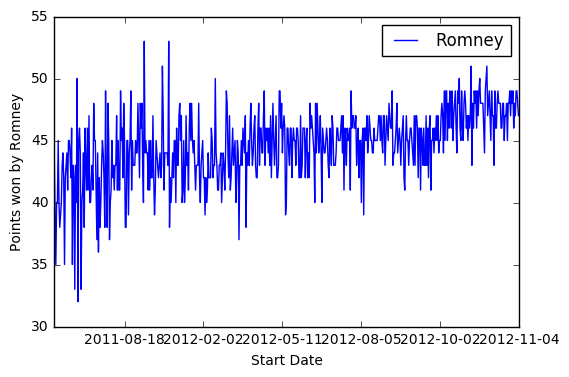

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot Romney's point along time
plt.figure()

# Put dates on x-axis and points receieved on y-axis
poll_df.plot(x='Start Date',y='Romney').invert_xaxis()

# Label the axes
plt.xlabel('Start Date')
plt.ylabel('Points won by Romney')


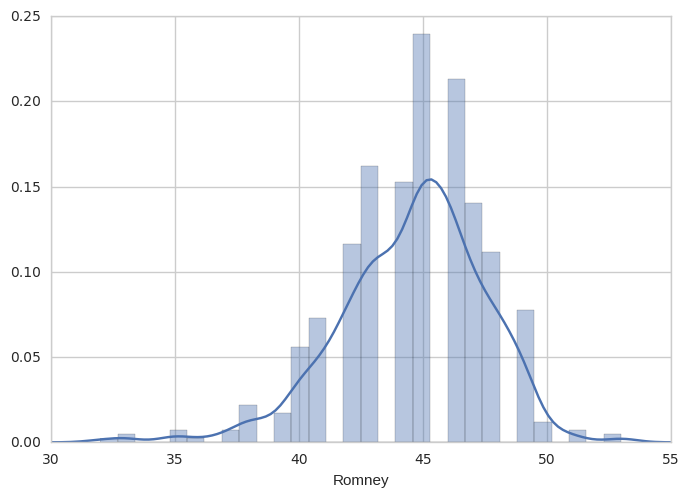

In [7]:
# Distribution plot of Romney's points
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(poll_df.Romney)
sns.plt.show()